In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
rc('font',family='Comic Sans MS')

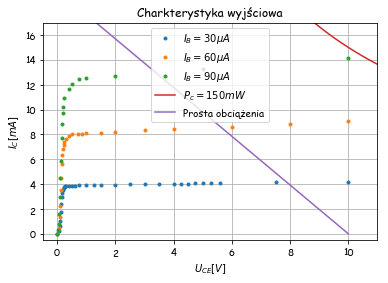

In [7]:
wyjsciowa3 = pd.read_csv('IB30.csv')
wyjsciowa6 = pd.read_csv('IB60.csv')
wyjsciowa9 = pd.read_csv('IB90.csv')
WykresoweU = np.linspace(0.1,10)
WykresoweI = np.linspace(0.1,14)
plt.plot(wyjsciowa3['UCE[V]'],wyjsciowa3['IC[mA]'],'.',label=r'$I_B=30\mu A$')
plt.plot(wyjsciowa6['UCE[V]'],wyjsciowa6['IC[mA]'],'.',label=r'$I_B=60\mu A$')
plt.plot(wyjsciowa9['UCE[V]'],wyjsciowa9['IC[mA]'],'.',label=r'$I_B=90\mu A$')
plt.grid()
plt.xlabel(r'$U_{CE}[V]$')
plt.ylabel(r'$I_C[mA]$')
plt.title('Charakterystyka wyjściowa')
plt.legend(loc='best')
pc15 = 150 #mW
UWykresowe15 = np.linspace(2,15) 
plt.plot(UWykresowe15,pc15/UWykresowe15,'-',label=r'$P_c = 150mW$')
R = 510 #Om
U = 10 #V
plt.plot([0,U],[U/R*1e3,0],label='Prosta obciążenia')
plt.xlabel(r'$U_{CE}[V]$')
plt.ylabel(r'$I_C[mA]$')
plt.title('Charkterystyka wyjściowa')
plt.ylim(-0.5,17)
plt.xlim(-0.5,11)
plt.legend(loc='best')
# plt.savefig('Wyjsciowa.png')

r_0= 8.909 +/- 0.337
B = 141.743 +/- 
beta = 149.153 +/-


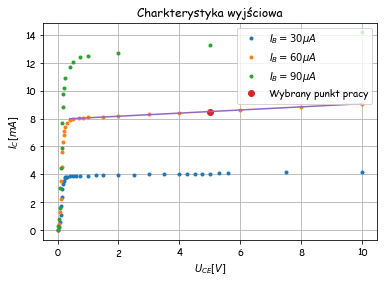

In [25]:
plt.plot(wyjsciowa3['UCE[V]'],wyjsciowa3['IC[mA]'],'.',label=r'$I_B=30\mu A$')
plt.plot(wyjsciowa6['UCE[V]'],wyjsciowa6['IC[mA]'],'.',label=r'$I_B=60\mu A$')
plt.plot(wyjsciowa9['UCE[V]'],wyjsciowa9['IC[mA]'],'.',label=r'$I_B=90\mu A$')
plt.plot()
plt.grid()
plt.xlabel(r'$U_{CE}[V]$')
plt.ylabel(r'$I_C[mA]$')
plt.title('Charakterystyka wyjściowa')
plt.xlabel(r'$U_{CE}[V]$')
plt.ylabel(r'$I_C[mA]$')
plt.title('Charkterystyka wyjściowa')
zakres = 12
prosta, cov = np.polyfit(wyjsciowa6['UCE[V]'][zakres:],wyjsciowa6['IC[mA]'][zakres:],1,cov=True)
U_pracy = 5 #V
I_pracy = 5*prosta[0]+prosta[1] #mA
plt.plot(U_pracy,I_pracy,'o',label='Wybrany punkt pracy')
plt.legend(loc='best')
plt.plot(wyjsciowa6['UCE[V]'][zakres:],wyjsciowa6['UCE[V]'][zakres:]*prosta[0]+prosta[1])
# plt.savefig('Wyjsciowa.png')
print('r_0= {:.3f} +/- {:.3f}'.format(1/prosta[0],np.sqrt(cov[0,0])/prosta[0]**2))
B = I_pracy/60e-3
print('B = {:.3f} +/- '.format(B))
beta = (I_pracy-wyjsciowa3['IC[mA]'][8])/30e-3
print('beta = {:.3f} +/-'.format(beta))

ValueError: x and y must have same first dimension, but have shapes (9,) and (13,)

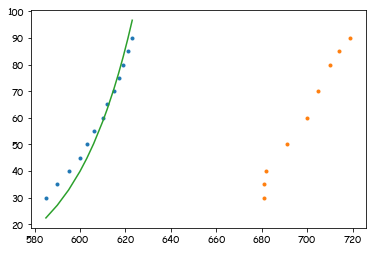

In [45]:
wejsciowa0 = pd.read_csv('UCE0.csv') # U[mV] I[miA]
wejsciowa1 = pd.read_csv('UCE1.csv')
plt.plot(wejsciowa0['UBE[mV]'],wejsciowa0['iB[miA]'],'.',label=r'$U_{CE}=0V$')
plt.plot(wejsciowa1['UBE[mV]'],wejsciowa1['iB[miA]'],'.',label=r'$U_{CE}=10V$')
def Schockley(U_BE,I_BS):
    return I_BS*(np.exp(U_BE/26e-3)-1)
I_BS, I_BS_Cov = curve_fit(Schockley,wejsciowa0['UBE[mV]']*1e-3,wejsciowa0['iB[miA]'],)
plt.plot(wejsciowa0['UBE[mV]'],Schockley(wejsciowa0['UBE[mV]']*1e-3,I_BS),label='dopasowana krzywa 0V')
plt.plot(wejsciowa1['UBE[mV]'],Schockley(wejsciowa0['UBE[mV]']*1e-3,I_BS),label='dopasowana krzywa 10V')
plt.grid()
plt.xlabel(r'$U_{BE}[mV]$')
plt.ylabel(r'$I_B[\mu A]$')
plt.title('Charakterystyka wejściowa')
plt.legend(loc='best')
print('I_B zeby I_C = 10mA: {:.3f}'.format(10/beta))
print('r_e = {:.3f}'.format(beta*26/I_pracy))
# plt.savefig('Wejsciowa.png',dpi=150)